In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#list_names = ['User1', 'User3', 'User4','User5']#, 'User6', 'User7']
list_names = ['User3', 'User3']#,'User4', 'User5', 'User6']#, 'User7']

#list_names = ['User1','User3', 'User4', 'User5', 'User6', 'User7']
nbUsers = len(list_names)

list_alpha = [0, 0.25, 0.5, 0.75, 1]#, 0.05, 0.1, 0.15, 0.2, 0.3]
nbAlpha = len(list_alpha)

list_beta = [1.05]
list_gamma = [0]

nbBetaGamma = len(list_beta)

In [2]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [3]:
globalAnalysis = pd.DataFrame()
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)




In [4]:
analysisBoneDistPerScale = pd.DataFrame()
analysisBoneDistPerObj = pd.DataFrame()
analysisBoneDistPerTask = pd.DataFrame()


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-BoneDist-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([betaGammaSummary, analysisBoneDistPerObj], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-BoneDist-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([betaGammaSummary, analysisBoneDistPerTask], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-BoneDist-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([betaGammaSummary, analysisBoneDistPerScale], axis = 0, sort = True)

    

In [5]:
#This is the mean over all the users
meanUsers = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanUsersBeta = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Beta'] == list_beta[paramB]) & (globalAnalysis['Gamma'] == list_gamma[paramB])
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        for j in range(0, 38):
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

        meanUsers = pd.concat([meanUsersBeta, meanUsers], axis = 0, sort = True)
            

In [6]:
analysisPerScale.head()

Beta  Gamma  Tolerance   User      large     medium      small
Tolerance                                                                
0          1.05    0.0          0  User3   3.663461   6.168362   5.913260
300        1.05    0.0        300  User3  12.720006  22.725509  19.602824
350        1.05    0.0        350  User3  14.098655  26.855130  23.145584
400        1.05    0.0        400  User3  15.932363  31.730039  25.693680
450        1.05    0.0        450  User3  17.333338  36.045093  27.858371

In [7]:
meanPerObj = pd.DataFrame()
meanPerTask = pd.DataFrame()
meanPerScale = pd.DataFrame()


for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanPerObjB = pd.DataFrame()
        meanPerScaleB = pd.DataFrame()
        meanPerTaskB = pd.DataFrame()
        
        cond = (analysisPerScale['Tolerance'] == analysisPerScale['Tolerance'].iloc[tol]) & (analysisPerScale['Beta'] == list_beta[paramB]) & (analysisPerScale['Gamma'] == list_gamma[paramB])
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        for j in range(0, len(objects)):
            meanPerObjB.loc[globalAnalysis['Tolerance'].iloc[tol], objects[j]] = analysisPerObj[cond][objects[j]].mean()
        meanPerObj = pd.concat([meanPerObjB, meanPerObj], axis = 0, sort = True)
        
        for j in range(0, len(tasks)):
            meanPerTaskB.loc[globalAnalysis['Tolerance'].iloc[tol], tasks[j]] = analysisPerTask[cond][tasks[j]].mean()
        meanPerTask = pd.concat([meanPerTaskB, meanPerTask], axis = 0, sort = True)
        
        for j in range(0, len(scales)):
            meanPerScaleB.loc[globalAnalysis['Tolerance'].iloc[tol], scales[j]] = analysisPerScale[cond][scales[j]].mean()
        meanPerScale = pd.concat([meanPerScaleB, meanPerScale], axis = 0, sort = True)
        
        
           

In [8]:
allConfig = pd.DataFrame()

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-AllConfigTypes-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Config'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Config'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary.index = betaGammaSummary['Tolerance']
        #betaGammaSummary['Beta'] = float(beta)
        #betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        allConfig = pd.concat([betaGammaSummary, allConfig], axis = 0, sort = True)

In [9]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.1000  \
0       0                  0.0                2.902450   
1       1                  0.0               28.603788   
2       2                  0.0               23.342437   
3       3                  0.0               76.709206   
4       4                  0.0               22.569910   

   DistBoneInTolTime.1050  DistBoneInTolTime.1100  DistBoneInTolTime.1150  \
0                2.902450                2.902450                2.902450   
1               28.657994               28.834500               29.958812   
2               23.327050               23.291650               23.291650   
3               88.220238               91.975556               93.276281   
4               22.828110               23.850340               30.590120   

   DistBoneInTolTime.1200  DistBoneInTolTime.1250  DistBoneInTolTime.1300  \
0                2.788450                2.788450                2.788450   
1               29.958812               30.926706               31.708871   
2               23.247238               23.340637               23.588225   
3               93.736500              101.739875              104.052231   
4               37.132090               40.324650               41.435050   

   DistBoneInTolTime.1350  ...  DistanceInTolTime.700  DistanceInTolTime.750  \
0                2.788450  ...              34.956049              34.956049   
1               33.509076  ...              23.711434              26.744516   
2               23.733250  ...              25.845385              27.551935   
3              104.816750  ...              34.510484              57.803721   
4               41.435050  ...              32.546132              39.615582   

   DistanceInTolTime.800  DistanceInTolTime.850  DistanceInTolTime.900  \
0              34.956049              34.956049              35.252999   
1              26.782904              26.886669              26.938875   
2              28.098960              29.597135              29.721798   
3              61.026627              61.427446              62.189996   
4              45.748552              54.874452              57.559292   

   DistanceInTolTime.950   Obj  Scale       Task   User  
0              35.252999  obj0  small      Touch  User3  
1              26.938875  obj0  small      Raise  User3  
2              30.479523  obj0  small       Pull  User3  
3              63.712127  obj0  small       Push  User3  
4              57.828052  obj0  small  Push Down  User3  

[5 rows x 77 columns]

In [10]:
meanPerScale.tail()

Beta  Gamma      large     medium      small
450  1.05    0.0  17.333338  36.045093  27.858371
400  1.05    0.0  15.932363  31.730039  25.693680
350  1.05    0.0  14.098655  26.855130  23.145584
300  1.05    0.0  12.720006  22.725509  19.602824
0    1.05    0.0   3.663461   6.168362   5.913260

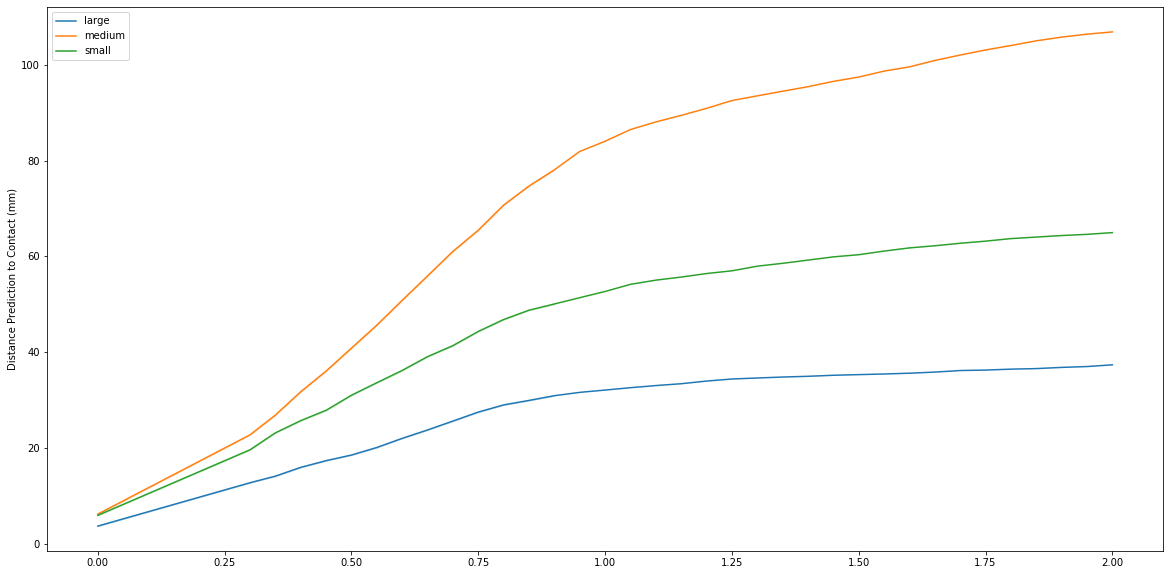

In [11]:
plt.figure(figsize = (20,10))
cond = (meanPerScale['Beta'] == 1.05) & (meanPerScale['Gamma'] == 0)
toleranceplt = meanPerScale.index/1000
sns.lineplot(x = toleranceplt , y = 'large', data = meanPerScale, label = 'large')
sns.lineplot(x = toleranceplt, y = 'medium', data = meanPerScale, label = 'medium')#[cond])
sns.lineplot(x = toleranceplt, y = 'small', data = meanPerScale, label = 'small')#[cond])
plt.ylabel('Distance Prediction to Contact (mm)')
plt.xlabel = ('Time')
plt.legend()

In [12]:
globalAnalysis

Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  \
Tolerance                                                           
0          1.05    0.000000    0.000000     0.000000     0.000000   
300        1.05   16.423394   15.270681    22.802557    21.113219   
350        1.05   20.679413   19.470069    27.285453    25.495599   
400        1.05   26.698438   25.489094    29.632716    29.723285   
450        1.05   30.353526   30.344601    33.222529    32.754312   
500        1.05   32.283250   32.274325    38.780300    39.303143   
550        1.05   30.747506   32.475769    41.527850    42.415323   
600        1.05   29.605901   31.334163    44.011778    46.185427   
650        1.05   31.586944   33.780401    47.532117    50.917067   
700        1.05   31.074725   31.928881    49.893821    53.482393   
750        1.05   49.143900   49.998056    51.725807    55.558434   
800        1.05   55.348075   56.202231    51.508838    58.686737   
850        1.05   70.157994   71.012150    54.530774    64.014903   
900        1.05   74.469069   79.131094    56.136393    72.874982   
950        1.05   86.005719   91.279494    64.003722    77.024458   
1000       1.05  102.479388  103.945294    65.037281    82.445448   
1050       1.05  107.970344  111.566600    64.623112    83.572354   
1100       1.05  113.993437  118.416925    65.120678    88.638311   
1150       1.05  121.961938  123.643325    67.753026    88.812123   
1200       1.05  124.340706  125.830963    71.022374    93.422582   
1250       1.05  126.743819  128.234075    70.099948    95.420699   
1300       1.05  129.270175  130.124331    71.873428    97.075020   
1350       1.05  129.785175  131.741788    74.555503    98.402509   
1400       1.05  132.314506  134.271119    75.945610   104.232013   
1450       1.05  133.684969  134.539125    80.441426   105.790974   
1500       1.05  137.188550  138.042706    85.658498   106.510459   
1550       1.05  136.730944  137.354737    96.534016   109.700514   
1600       1.05  136.872369  137.496163    98.882890   113.693095   
1650       1.05  138.632956  140.170425   102.432940   114.288290   
1700       1.05  140.697919  142.221419   106.418884   116.008778   
...         ...         ...         ...          ...          ...   
550        1.05   30.747506   32.475769    41.527850    42.415323   
600        1.05   29.605901   31.334163    44.011778    46.185427   
650        1.05   31.586944   33.780401    47.532117    50.917067   
700        1.05   31.074725   31.928881    49.893821    53.482393   
750        1.05   49.143900   49.998056    51.725807    55.558434   
800        1.05   55.348075   56.202231    51.508838    58.686737   
850        1.05   70.157994   71.012150    54.530774    64.014903   
900        1.05   74.469069   79.131094    56.136393    72.874982   
950        1.05   86.005719   91.279494    64.003722    77.024458   
1000       1.05  102.479388  103.945294    65.037281    82.445448   
1050       1.05  107.970344  111.566600    64.623112    83.572354   
1100       1.05  113.993437  118.416925    65.120678    88.638311   
1150       1.05  121.961938  123.643325    67.753026    88.812123   
1200       1.05  124.340706  125.830963    71.022374    93.422582   
1250       1.05  126.743819  128.234075    70.099948    95.420699   
1300       1.05  129.270175  130.124331    71.873428    97.075020   
1350       1.05  129.785175  131.741788    74.555503    98.402509   
1400       1.05  132.314506  134.271119    75.945610   104.232013   
1450       1.05  133.684969  134.539125    80.441426   105.790974   
1500       1.05  137.188550  138.042706    85.658498   106.510459   
1550       1.05  136.730944  137.354737    96.534016   109.700514   
1600       1.05  136.872369  137.496163    98.882890   113.693095   
1650       1.05  138.632956  140.170425   102.432940   114.288290   
1700       1.05  140.697919  142.221419   106.418884   116.008778   
1750       1.05  146.708013  147.676725   104.628078   119.480362   
1800     

In [13]:
analysisPerTask.head()

Beta  Gamma       Pull       Push  Push Down      Raise  Tolerance  \
Tolerance                                                                       
0          1.05    0.0   4.610366   2.720173   5.869520   6.909155          0   
300        1.05    0.0  18.855714  15.303036  14.400222  24.046438        300   
350        1.05    0.0  23.129626  18.014928  15.872447  27.851370        350   
400        1.05    0.0  25.478582  19.966994  18.002949  31.904189        400   
450        1.05    0.0  28.475457  22.173058  19.190514  35.094127        450   

               Touch   User  
Tolerance                    
0           6.132592  User3  
300        19.141822  User3  
350        21.963910  User3  
400        26.907422  User3  
450        30.461515  User3

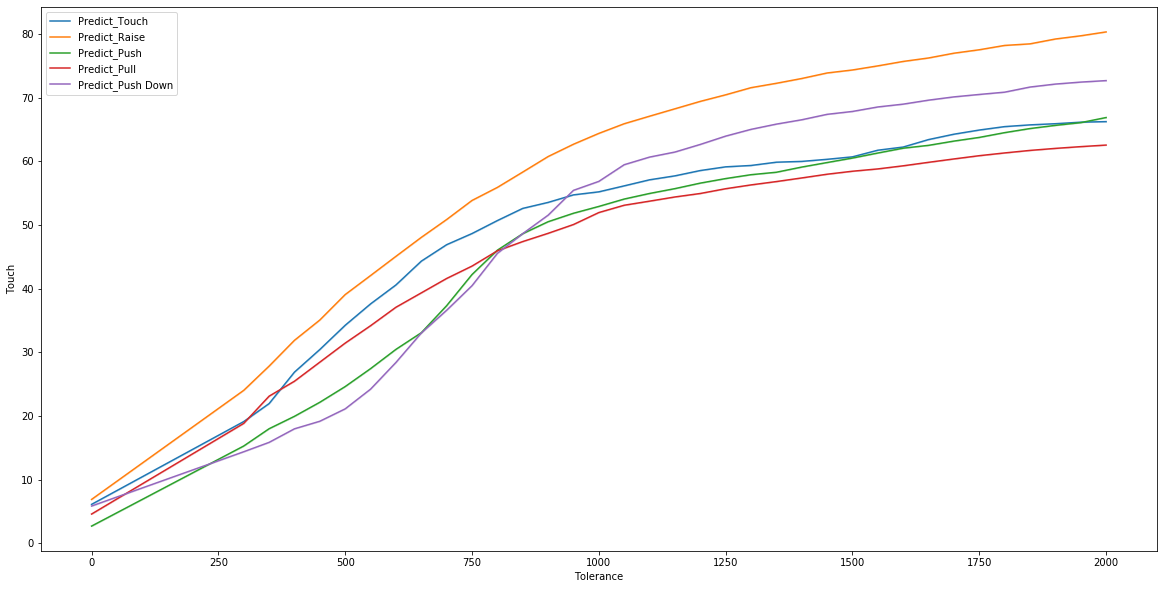

In [14]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')

#plt.figure(figsize=(20,10))
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')


In [29]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.1000  \
0       0                  0.0                2.902450   
1       1                  0.0               28.603788   
2       2                  0.0               23.342437   
3       3                  0.0               76.709206   
4       4                  0.0               22.569910   

   DistBoneInTolTime.1050  DistBoneInTolTime.1100  DistBoneInTolTime.1150  \
0                2.902450                2.902450                2.902450   
1               28.657994               28.834500               29.958812   
2               23.327050               23.291650               23.291650   
3               88.220238               91.975556               93.276281   
4               22.828110               23.850340               30.590120   

   DistBoneInTolTime.1200  DistBoneInTolTime.1250  DistBoneInTolTime.1300  \
0                2.788450                2.788450                2.788450   
1               29.958812               30.926706               31.708871   
2               23.247238               23.340637               23.588225   
3               93.736500              101.739875              104.052231   
4               37.132090               40.324650               41.435050   

   DistBoneInTolTime.1350  ...  DistInTolTime.1550  DistInTolTime.1600  \
0                2.788450  ...           44.951598           44.951598   
1               33.509076  ...           33.157975           33.288798   
2               23.733250  ...           32.123335           32.123335   
3              104.816750  ...           76.934302           79.583215   
4               41.435050  ...           62.739952           63.257092   

   DistInTolTime.1650  DistInTolTime.1700  DistInTolTime.1750  \
0           44.951598           44.951598           44.951598   
1           33.288798           33.462763           33.462763   
2           32.531435           33.461698           33.461698   
3           79.583215           79.583215           79.583215   
4           64.942892           66.494312           66.494312   

   DistInTolTime.1800  DistInTolTime.1850  DistInTolTime.1900  \
0           44.951598           45.032798           45.032798   
1           33.462763           33.494751           33.511428   
2           35.869298           38.435748           38.435748   
3           81.763496           82.074359           82.183834   
4           66.494312           66.494312           66.494312   

   DistInTolTime.1950  DistInTolTime.2000  
0           45.032798           45.032798  
1           33.511428           33.511428  
2           38.479035           38.589048  
3           82.238377           82.257559  
4           66.494312           66.494312  

[5 rows x 113 columns]

In [16]:
allConfig['DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig.loc[allConfig['DistanceInTolTime.0'] <= 0, 'DistInTolTime.0'] = 0
#allConfig.loc[allConfig['DistanceInTolTime.0'] > 0, 'DistInTolTime.0'] = allConfig['DistanceInTolTime.0']

for tol in range(300, 2050, 50):
    allConfig['DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] <= 0, 'DistInTolTime.'+str(tol)] = 0
    #allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] > 0, 'DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    

In [17]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.1000  \
0       0                  0.0                2.902450   
1       1                  0.0               28.603788   
2       2                  0.0               23.342437   
3       3                  0.0               76.709206   
4       4                  0.0               22.569910   

   DistBoneInTolTime.1050  DistBoneInTolTime.1100  DistBoneInTolTime.1150  \
0                2.902450                2.902450                2.902450   
1               28.657994               28.834500               29.958812   
2               23.327050               23.291650               23.291650   
3               88.220238               91.975556               93.276281   
4               22.828110               23.850340               30.590120   

   DistBoneInTolTime.1200  DistBoneInTolTime.1250  DistBoneInTolTime.1300  \
0                2.788450                2.788450                2.788450   
1               29.958812               30.926706               31.708871   
2               23.247238               23.340637               23.588225   
3               93.736500              101.739875              104.052231   
4               37.132090               40.324650               41.435050   

   DistBoneInTolTime.1350  ...  DistInTolTime.1550  DistInTolTime.1600  \
0                2.788450  ...           44.951598           44.951598   
1               33.509076  ...           33.157975           33.288798   
2               23.733250  ...           32.123335           32.123335   
3              104.816750  ...           76.934302           79.583215   
4               41.435050  ...           62.739952           63.257092   

   DistInTolTime.1650  DistInTolTime.1700  DistInTolTime.1750  \
0           44.951598           44.951598           44.951598   
1           33.288798           33.462763           33.462763   
2           32.531435           33.461698           33.461698   
3           79.583215           79.583215           79.583215   
4           64.942892           66.494312           66.494312   

   DistInTolTime.1800  DistInTolTime.1850  DistInTolTime.1900  \
0           44.951598           45.032798           45.032798   
1           33.462763           33.494751           33.511428   
2           35.869298           38.435748           38.435748   
3           81.763496           82.074359           82.183834   
4           66.494312           66.494312           66.494312   

   DistInTolTime.1950  DistInTolTime.2000  
0           45.032798           45.032798  
1           33.511428           33.511428  
2           38.479035           38.589048  
3           82.238377           82.257559  
4           66.494312           66.494312  

[5 rows x 113 columns]

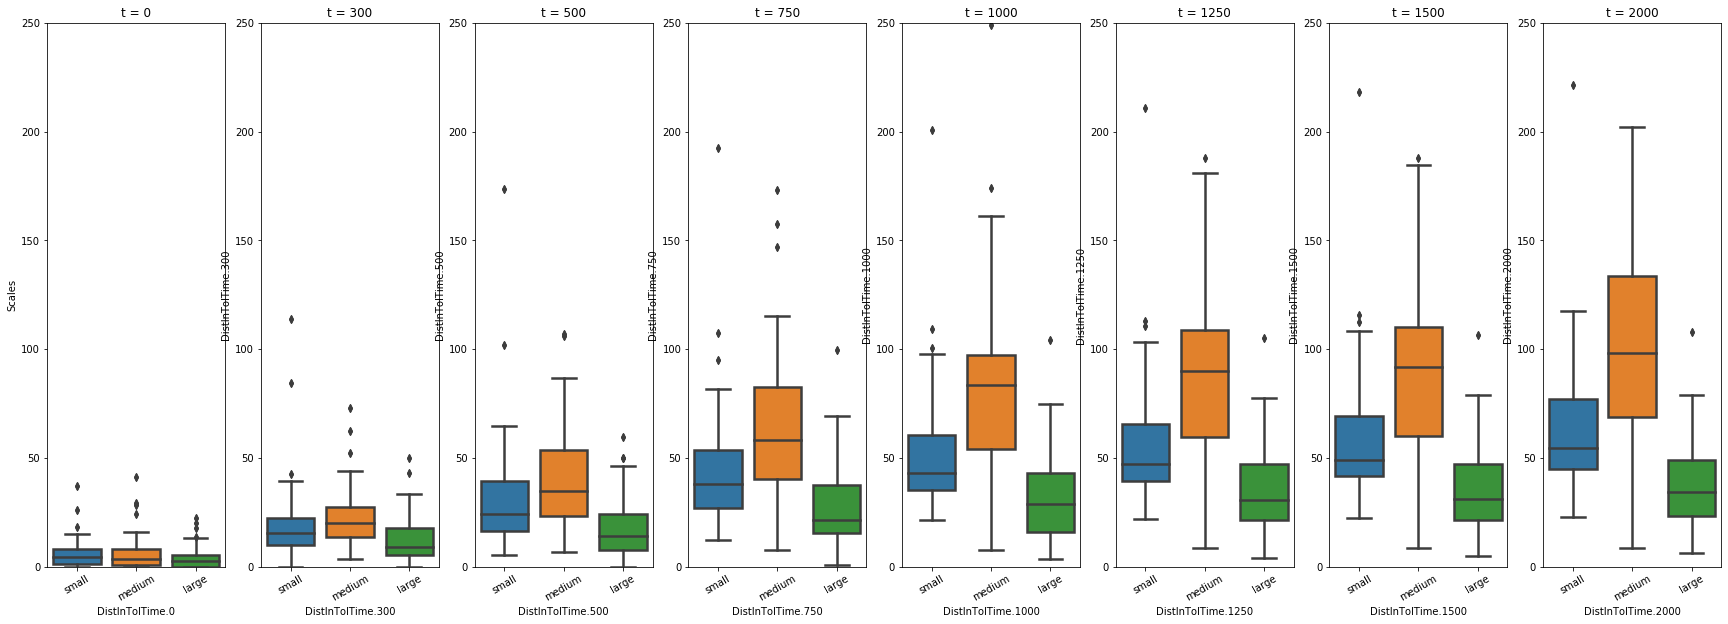

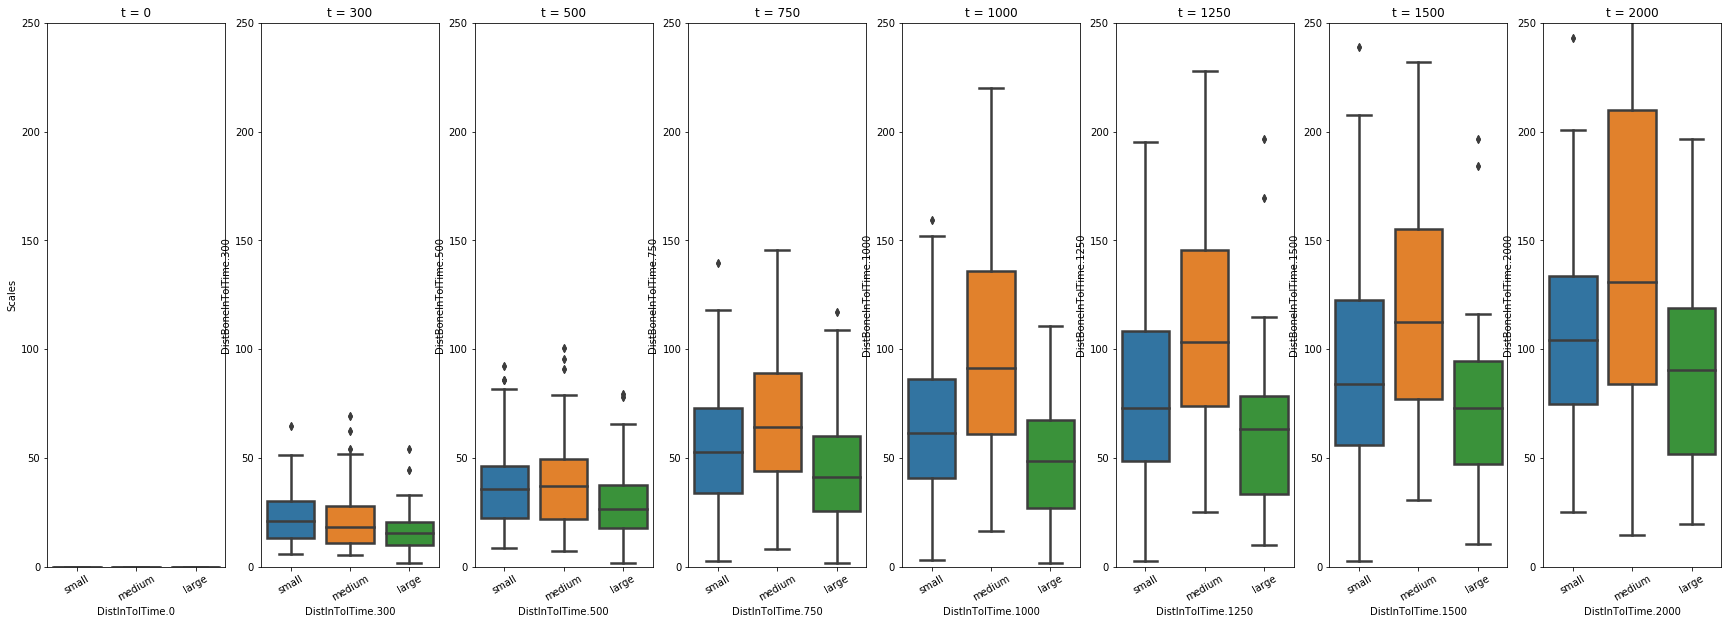

In [18]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
    

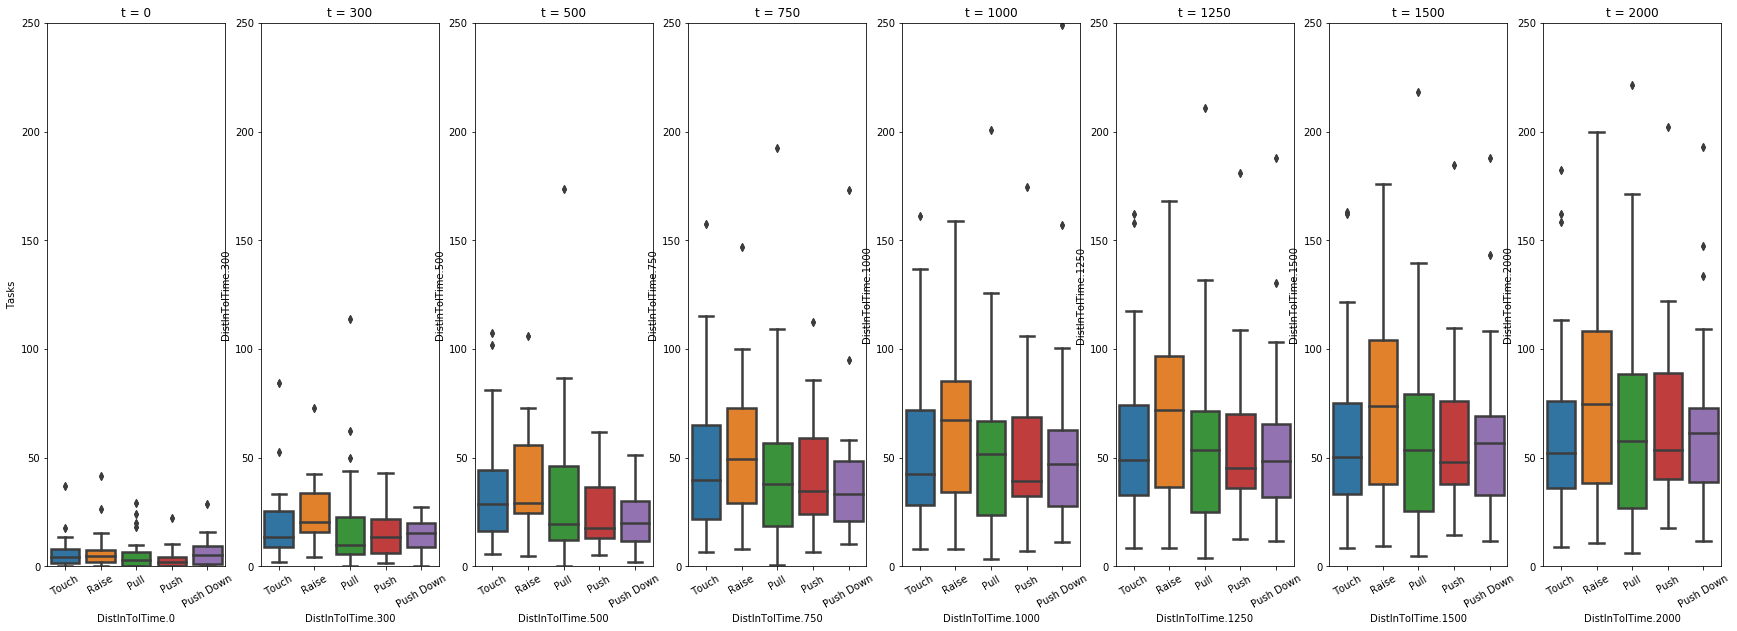

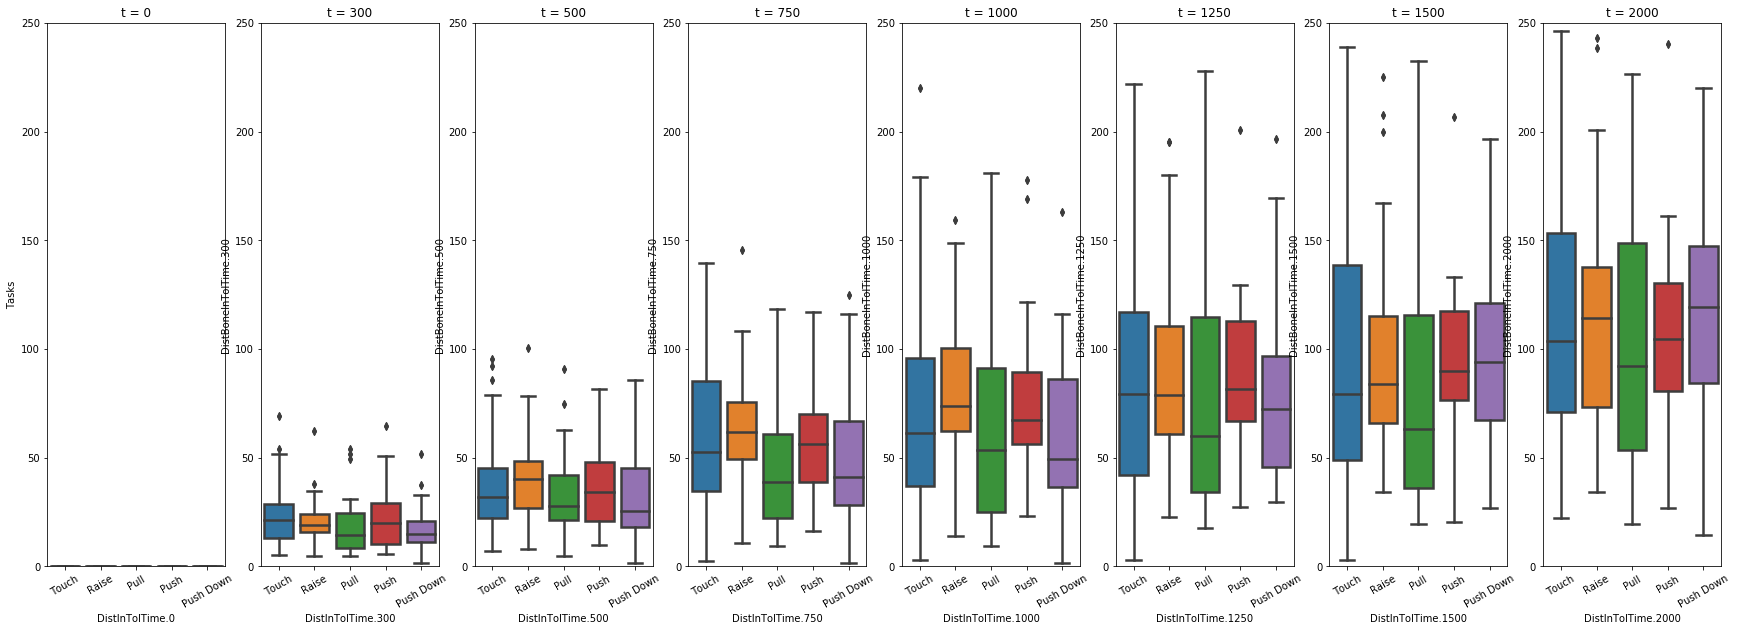

In [19]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


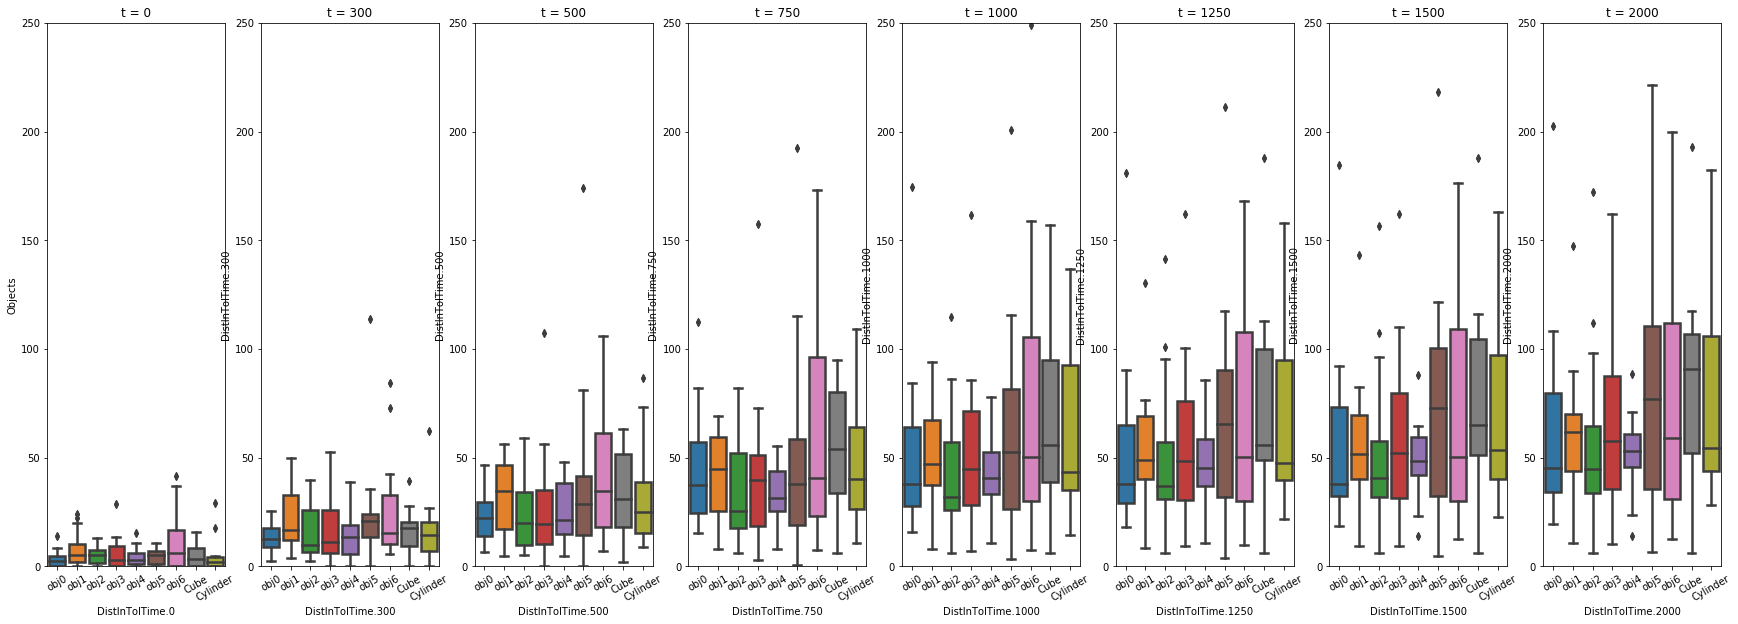

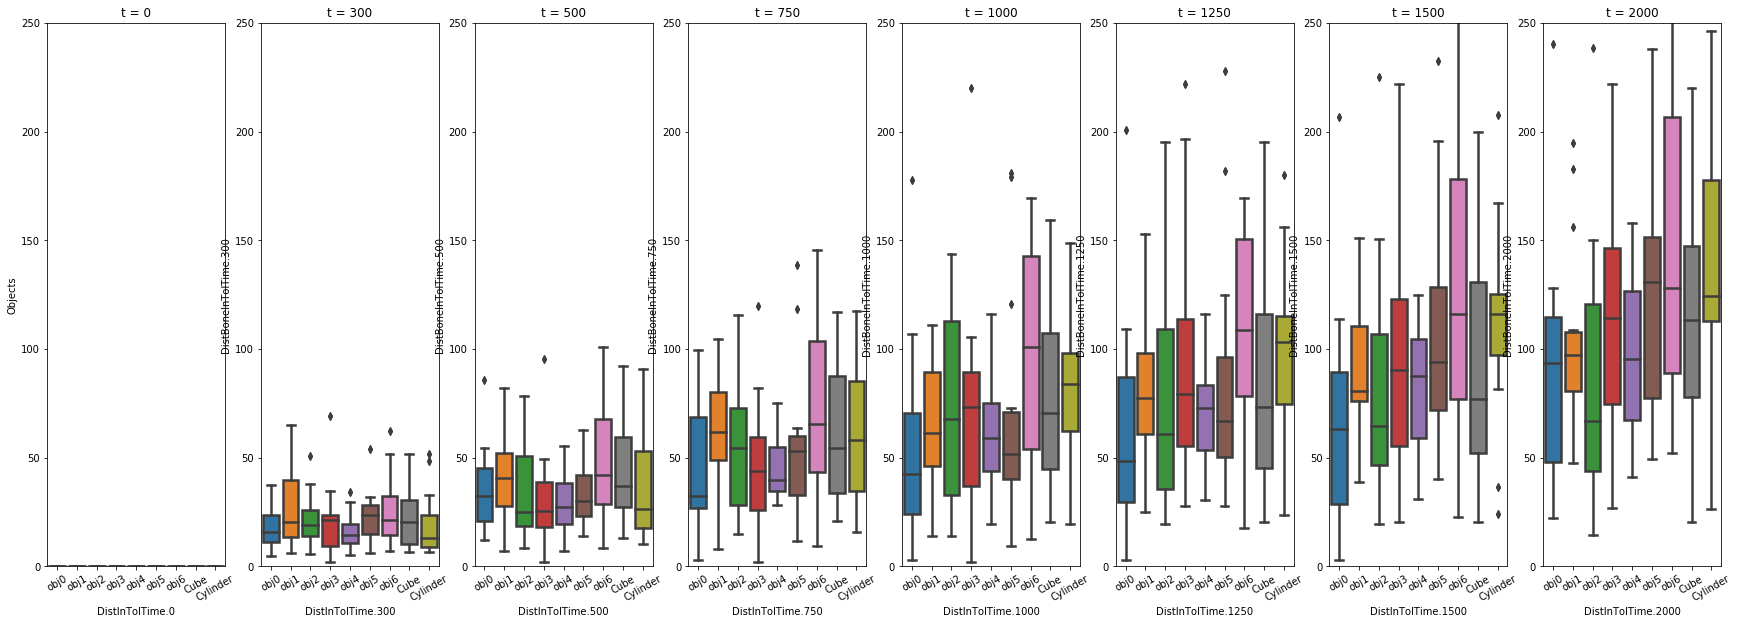

In [20]:

f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)

       

In [21]:
taskScale = pd.DataFrame()

tol = 300
for size in range(0, len(scales)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
        
        
taskObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
        
        
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        scaleObj.loc[scales[size], objects[obj]] = mean/nbUsers        

In [22]:
taskObj

Touch      Raise       Pull       Push  Push Down
obj0      11.957410   8.561552  11.443461  15.024928  17.296271
obj1       9.342949  15.651623  38.980992  31.557804  14.905135
obj2      15.777422  25.953463  12.920355  19.485358  10.355222
obj3      28.399683  22.494115   6.309587   9.659940  19.496415
obj4       9.737786  24.594345   6.085487  10.253366  20.579410
obj5      21.086297  25.162763  44.903262  16.047828  15.198669
obj6      35.691548  49.697823  13.901493  16.083489  12.064785
Cube      18.094526  24.094364  12.678409  10.691087  15.115162
Cylinder  22.188780  20.207893  25.459441   8.923519   4.690253

In [23]:
taskScale

Touch      Raise       Pull       Push  Push Down
small   20.869061  23.894457  25.050203  12.808797  15.424710
medium  19.790726  32.297798  23.193737  20.733096  17.612189
large   16.765680  15.947058   9.316889  12.367213  10.196875

In [24]:
scaleObj

obj0       obj1       obj2       obj3       obj4       obj5  \
small   11.721770  22.451070  11.166996  10.763754  14.553757  39.918117   
medium  17.442878  20.095854  25.112546  29.626343  14.180716  24.662189   
large    9.405525  23.716177  14.415549  11.425747  14.015763   8.858985   

             obj6       Cube   Cylinder  
small   36.568690  20.088655   9.252201  
medium  25.968355  20.857670  26.583033  
large   13.926439   7.457805  13.046698

# Scales and Tasks

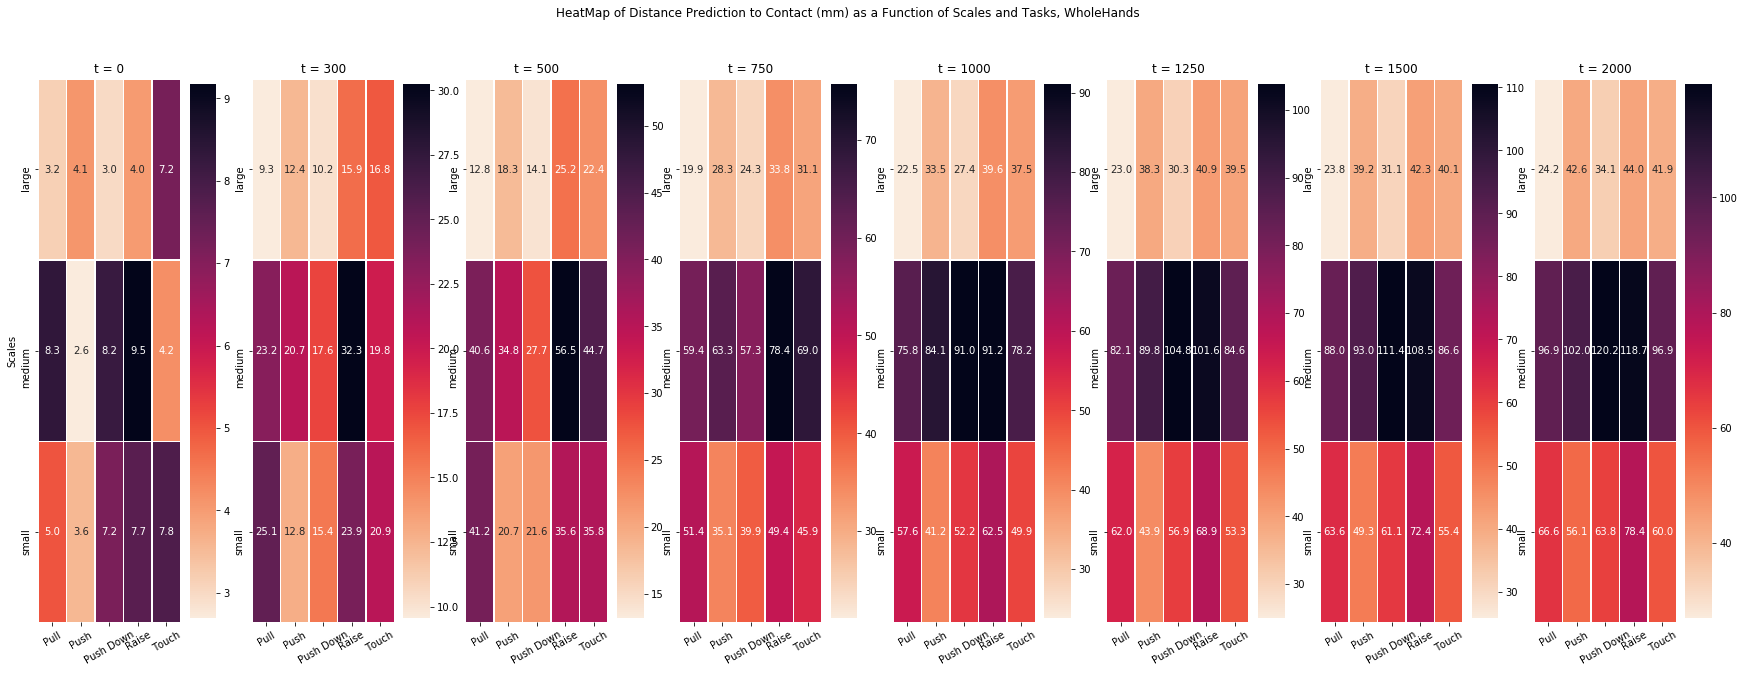

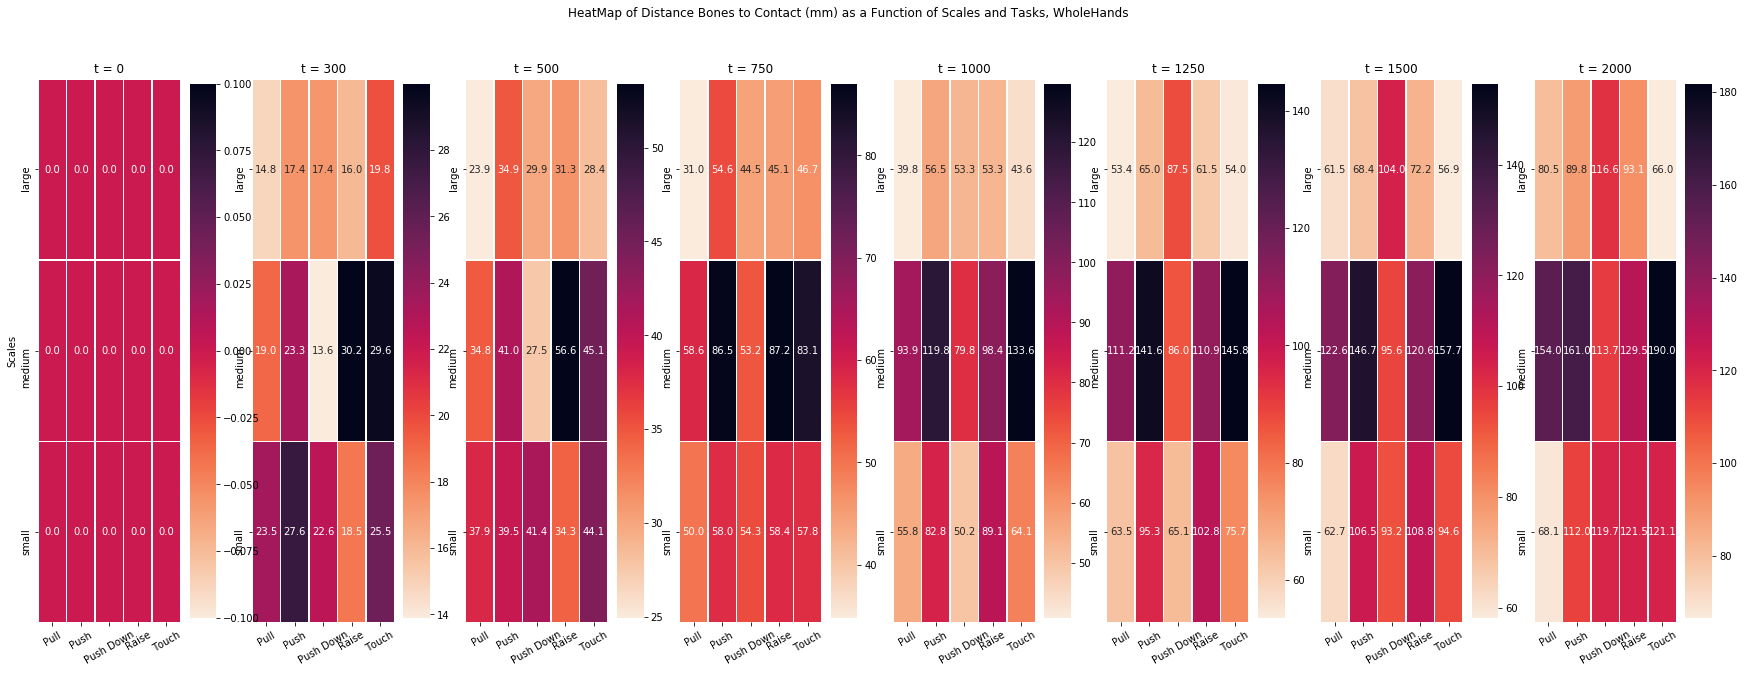

In [25]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, WholeHands')

plt.show()

In [26]:

tol = 300
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == 'obj6') & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)]
            

# Scales and Objects

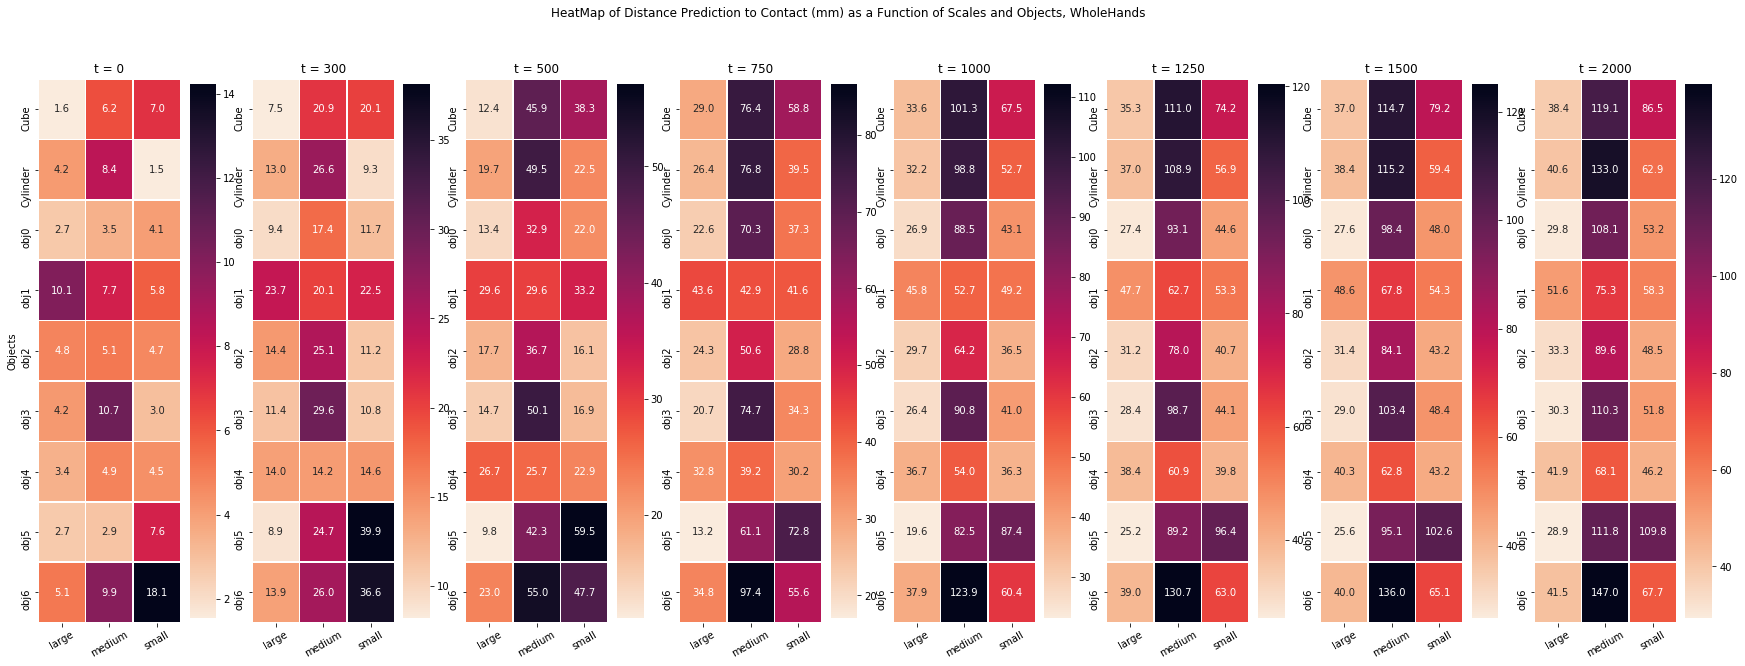

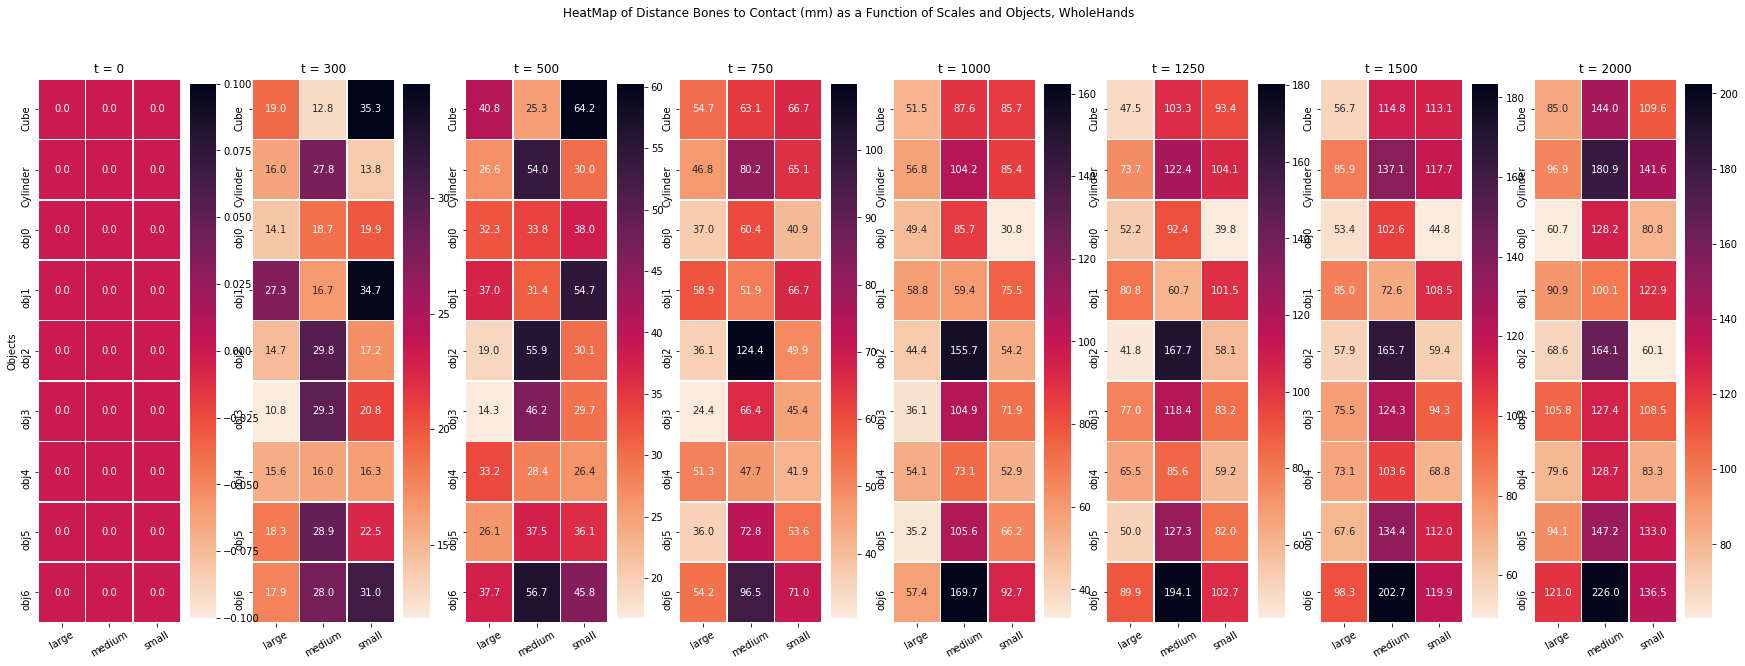

In [27]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers        
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Objects, WholeHands')

plt.show()

# Tasks and Objects

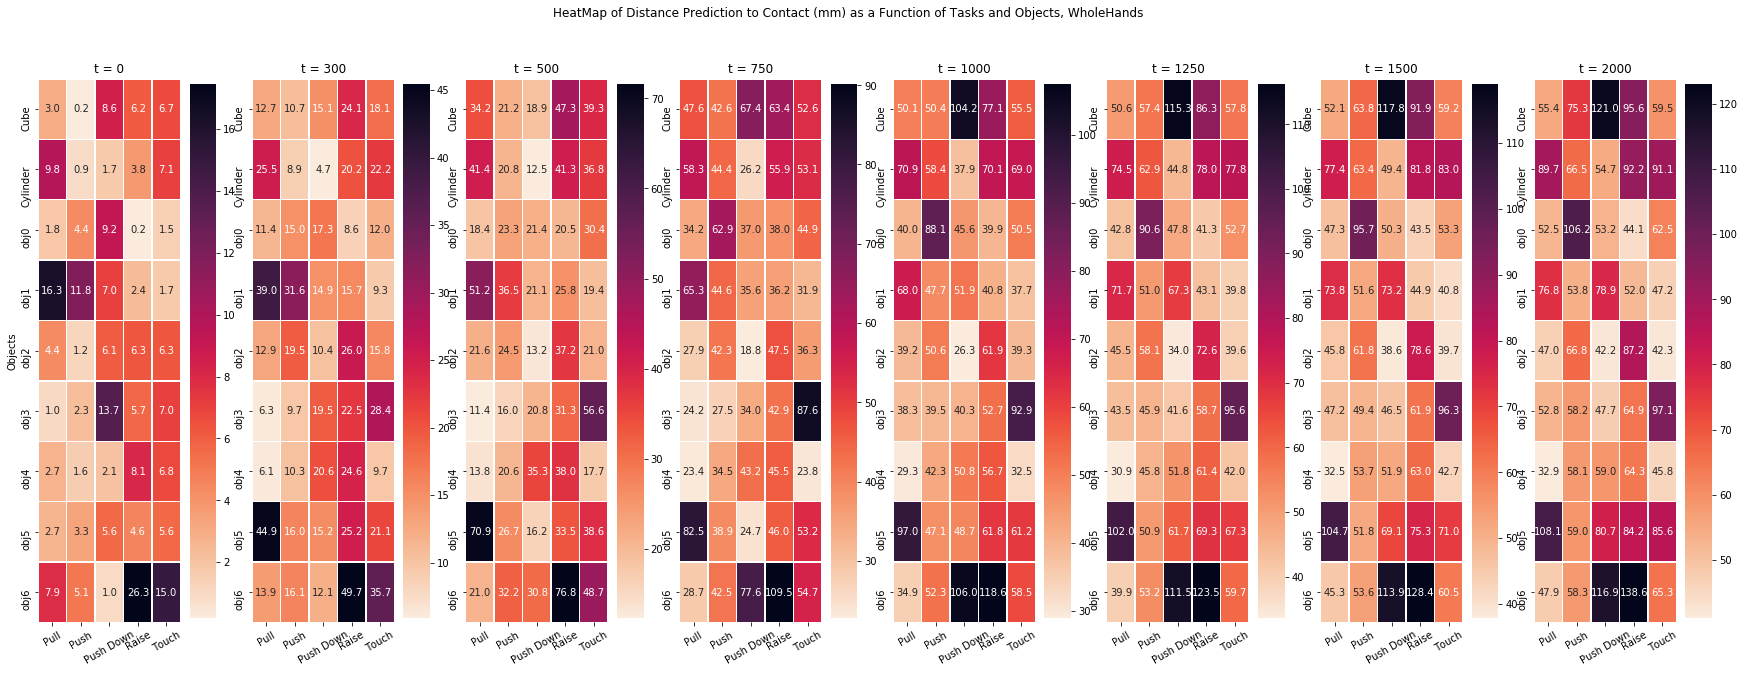

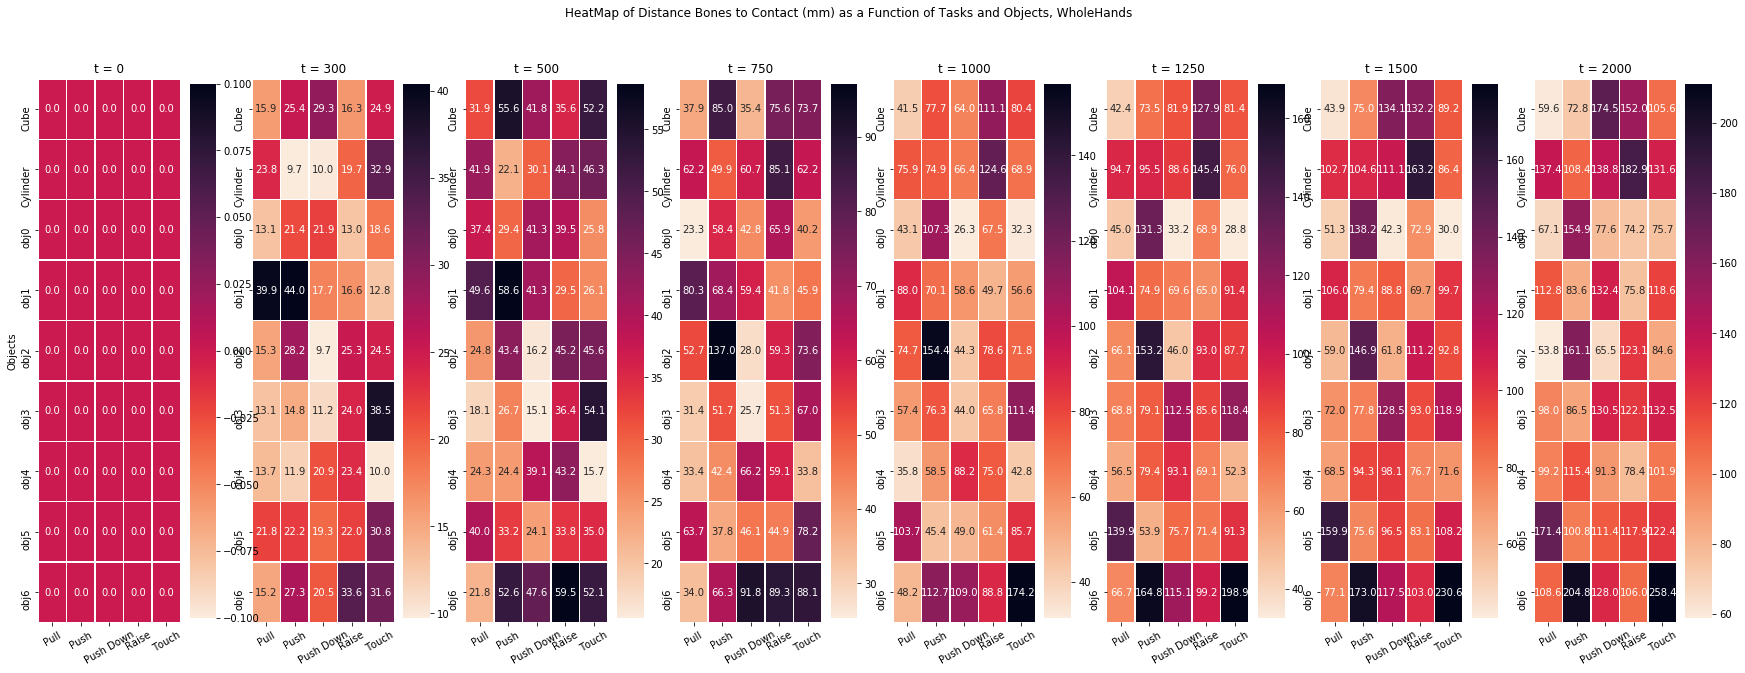

In [28]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Tasks and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Tasks and Objects, WholeHands')

plt.show()